# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Filza Rahma Muflihah
- Email: filzarahmamuflihah@gmail.com
- Id Dicoding: filzrahma

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sqlalchemy import create_engine
import os
import joblib

In [3]:
# Set style for plots
plt.style.use('ggplot')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

### Menyiapkan data yang akan digunakan

In [4]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv",
    sep=";"
)
print(f'Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')

Dataset memiliki 4424 baris dan 37 kolom


In [4]:
# Melihat 5 baris pertama dari dataset
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

### Analisis Struktur Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [7]:
df['Status'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

**Deskripsi Dataset Mahasiswa**

Dataset ini berisi informasi mengenai **4424 mahasiswa** dengan **37 kolom** yang mencakup berbagai aspek latar belakang mahasiswa, performa akademik, dan status pendidikan. Berikut penjelasan setiap kolom yang dikelompokkan berdasarkan kategorinya:

---

**Data Demografis & Sosial**

* **Marital\_status**: Status pernikahan mahasiswa (numerik/kategorikal)
* **Nationality**: Kewarganegaraan mahasiswa (numerik/kategorikal)
* **Gender**: Jenis kelamin mahasiswa (numerik/kategorikal)
* **Displaced**: Status pengungsi atau pemindahan (numerik/kategorikal)
* **Educational\_special\_needs**: Adakah kebutuhan pendidikan khusus (numerik/kategorikal)
* **Debtor**: Apakah mahasiswa memiliki utang (numerik/kategorikal)
* **International**: Apakah mahasiswa merupakan mahasiswa internasional (numerik/kategorikal)

---

**Data Orang Tua**

* **Mothers\_qualification**: Kualifikasi pendidikan ibu (numerik/kategorikal)
* **Fathers\_qualification**: Kualifikasi pendidikan ayah (numerik/kategorikal)
* **Mothers\_occupation**: Pekerjaan ibu (numerik/kategorikal)
* **Fathers\_occupation**: Pekerjaan ayah (numerik/kategorikal)

---

**Data Pendaftaran & Administrasi**

* **Application\_mode**: Mode pendaftaran (numerik/kategorikal)
* **Application\_order**: Urutan pilihan pendaftaran (numerik)
* **Course**: Program studi/kurikulum yang dipilih (numerik/kategorikal)
* **Daytime\_evening\_attendance**: Jadwal kehadiran (siang/malam) (numerik/kategorikal)
* **Previous\_qualification**: Kualifikasi sebelumnya sebelum mendaftar (numerik/kategorikal)
* **Previous\_qualification\_grade**: Nilai kualifikasi sebelumnya (numerik desimal)
* **Admission\_grade**: Nilai penerimaan (numerik desimal)
* **Tuition\_fees\_up\_to\_date**: Apakah pembayaran biaya kuliah sudah diperbarui (numerik/kategorikal)
* **Scholarship\_holder**: Apakah mahasiswa penerima beasiswa (numerik/kategorikal)
* **Age\_at\_enrollment**: Usia saat mendaftar (numerik)

---

**Data Akademik Semester 1**

* **Curricular\_units\_1st\_sem\_credited**: Jumlah SKS dikreditkan (numerik)
* **Curricular\_units\_1st\_sem\_enrolled**: Jumlah SKS yang diambil (numerik)
* **Curricular\_units\_1st\_sem\_evaluations**: Jumlah evaluasi/penilaian (numerik)
* **Curricular\_units\_1st\_sem\_approved**: Jumlah SKS yang disetujui/lulus (numerik)
* **Curricular\_units\_1st\_sem\_grade**: Rata-rata nilai semester 1 (numerik desimal)
* **Curricular\_units\_1st\_sem\_without\_evaluations**: Jumlah SKS tanpa evaluasi (numerik)

---

**Data Akademik Semester 2**

* **Curricular\_units\_2nd\_sem\_credited**: Jumlah SKS dikreditkan (numerik)
* **Curricular\_units\_2nd\_sem\_enrolled**: Jumlah SKS yang diambil (numerik)
* **Curricular\_units\_2nd\_sem\_evaluations**: Jumlah evaluasi/penilaian (numerik)
* **Curricular\_units\_2nd\_sem\_approved**: Jumlah SKS yang disetujui/lulus (numerik)
* **Curricular\_units\_2nd\_sem\_grade**: Rata-rata nilai semester 2 (numerik desimal)
* **Curricular\_units\_2nd\_sem\_without\_evaluations**: Jumlah SKS tanpa evaluasi (numerik)

---

**Data Makroekonomi**

* **Unemployment\_rate**: Tingkat pengangguran (%) saat pendaftaran (numerik desimal)
* **Inflation\_rate**: Tingkat inflasi (%) saat pendaftaran (numerik desimal)
* **GDP**: Produk domestik bruto (GDP) per kapita (numerik)

---

**Variabel Target**

* **Status**: Status akhir mahasiswa (kategorikal/teks)
  → **Ini adalah variabel target** (misalnya: lulus (Graduate), drop-out (Dropout), aktif (Enrolled))


### Cek Kualitas Data

In [8]:
# Memeriksa data duplikat
print("Banyaknya data duplikat: ", df.duplicated().sum())

Banyaknya data duplikat:  0


In [9]:
# Memeriksa nilai yang hilang
print("Jumlah nilai yang hilang dalam setiap kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang dalam setiap kolom:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_a

**Insight:**
Tidak ada missing value maupun data yang duplikat.

### Analisis Statistik Deskriptif

In [10]:
# Statistik deskriptif dataset
pd.set_option('display.max_columns', None)
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


### Analisis Korelasi

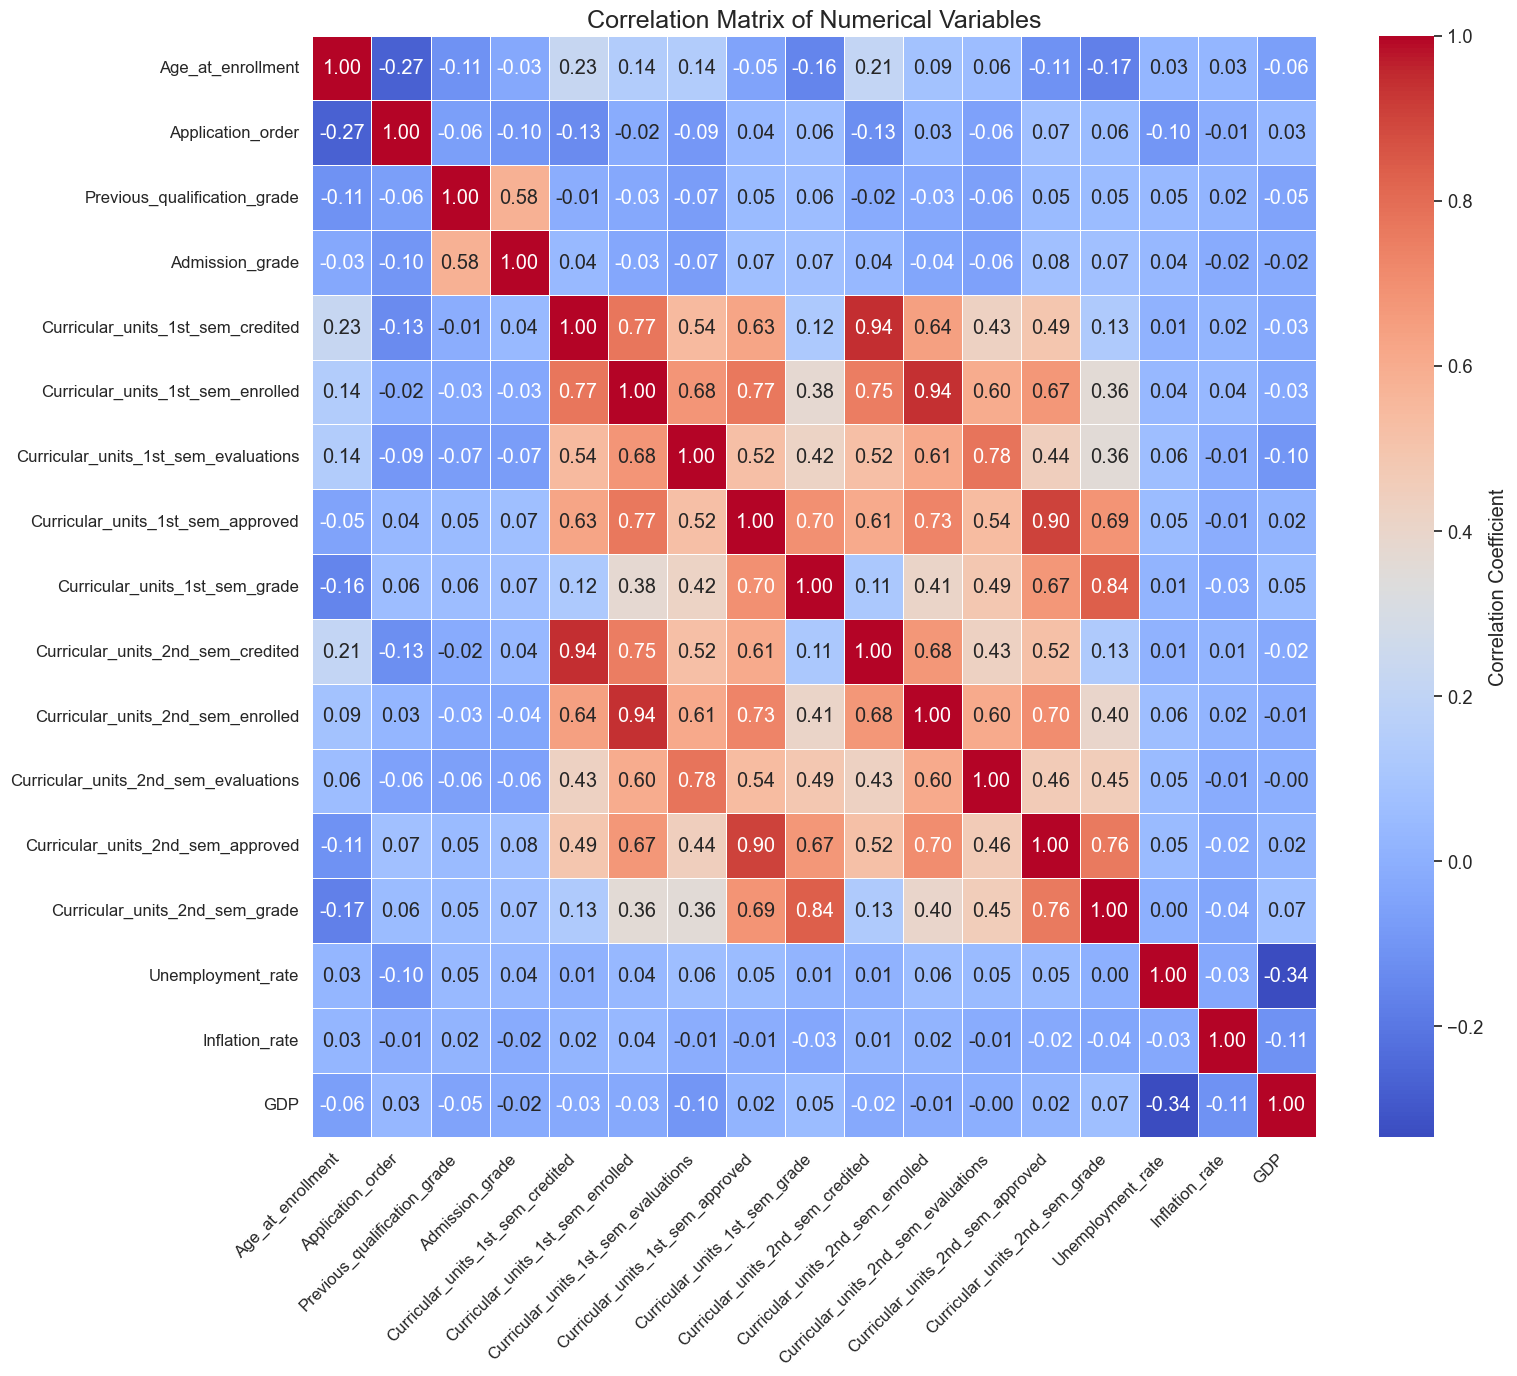

In [11]:
# Ukuran figure yang mungkin perlu lebih besar jika ada banyak fitur

numerical_features = [
    'Age_at_enrollment', 'Application_order', 'Previous_qualification_grade',
    'Admission_grade', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Unemployment_rate', 'Inflation_rate', 'GDP'
]

plt.figure(figsize=(16, 14)) # Ukuran yang lebih besar
correlation_matrix = df[numerical_features].corr()

sns.heatmap(correlation_matrix,
            annot=True,                 # Menampilkan nilai korelasi
            cmap='coolwarm',            # Skema warna
            fmt='.2f',                  # Format angka hingga 2 desimal
            linewidths=.5,              # Garis antar sel
            linecolor='white',          # Warna garis putih agar lebih jelas
            cbar_kws={'label': 'Correlation Coefficient'}) # Label untuk color bar

plt.title('Correlation Matrix of Numerical Variables', fontsize=18) # Ukuran font judul yang lebih besar

# **PENTING: Perbaiki label sumbu X yang tumpang tindih**
plt.xticks(rotation=45, ha='right', fontsize=12) # Putar label x, sesuaikan perataan, kurangi ukuran font
plt.yticks(rotation=0, fontsize=12)              # Pastikan label y horizontal, kurangi ukuran font

# **PENTING: Mengatur tata letak agar tidak mepet**
plt.subplots_adjust(bottom=0.2, left=0.15) # Menyesuaikan margin bawah dan kiri
                                        # `bottom` untuk memberi ruang label X yang diputar
                                        # `left` untuk memberi ruang label Y yang panjang
plt.tight_layout() # Gunakan ini setelah penyesuaian manual jika diperlukan, atau coba saja ini
                    # `tight_layout` seringkali cukup baik, tetapi `subplots_adjust` memberi kontrol lebih

plt.show()

### Exploratory Data Analysis

Pada tahap eksplorasi data ini dibatasi pada 5 pertanyaan bisnis berikut:
- Berapa persentase dropout mahasiswa pada Jaya Jaya Insitute?
- Apakah ada hubungan antara status pernikahan mahasiswa dan kemungkinan drop-out?
- Apakah mahasiswa yang menunggak biaya kuliah lebih banyak yang dropout?
- Apakah mahasiswa dengan nilai semester pertama rendah cenderung dropout?
- Apakah ada jurusan/program studi dengan tingkat dropout yang lebih tinggi?
- Apakah usia saat mendaftar memengaruhi risiko dropout?

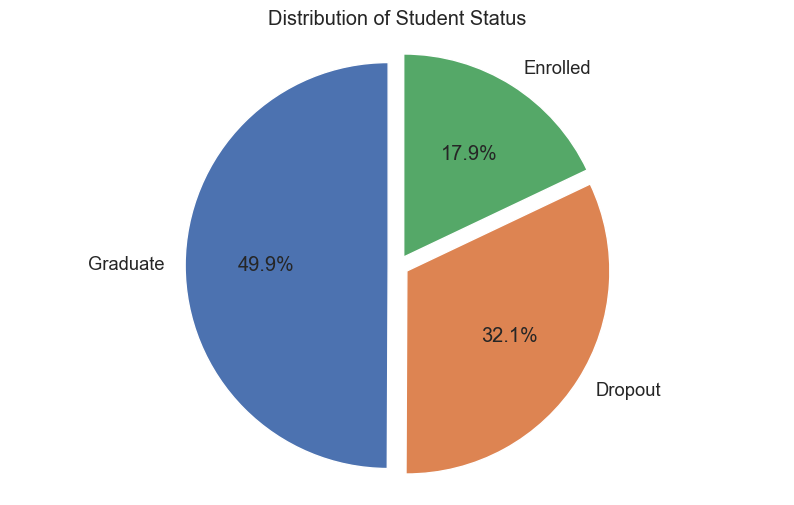

In [12]:
# Looking at the target variable distribution
plt.figure(figsize=(10, 6))
status_counts = df['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, explode=[0.05]*len(status_counts))
plt.title('Distribution of Student Status')
plt.axis('equal')
plt.show()

Jawaban pertanyaan 1: Sebanyak 32,1% mahasiswa dropout dari Jaya Jaya Institute.

In [40]:
# Mapping angka ke label status pernikahan
marital_status_map = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto Union',
    6: 'Legally Separated'
}

# Kolom baru
df['Marital_status_label'] = df['Marital_status'].map(marital_status_map)

# Hitung jumlah per (Marital_status_label, Status)
count_df = df.groupby(['Marital_status_label', 'Status']).size().reset_index(name='Count')

# Hitung total per Marital_status_label
total_per_marital = count_df.groupby('Marital_status_label')['Count'].transform('sum')

# Hitung persentase
count_df['Percentage'] = count_df['Count'] / total_per_marital * 100

# Tentukan mapping warna → Dropout merah
color_map = {
    'Dropout': 'red',
    'Graduate': 'green',
    'Enrolled': 'blue'
    # Jika ada Status lain → tambahkan di sini, contoh:
    # 'OtherStatus': 'gray'
}

fig = px.bar(
    count_df,
    x='Marital_status_label',
    y='Percentage',
    color='Status',
    title='Status Distribution per Marital Status (in %)',
    labels={'Marital_status_label': 'Marital Status', 'Percentage': 'Percentage (%)'},
    text_auto='.1f',
    color_discrete_map=color_map
)

fig.update_layout(
    yaxis=dict(tickformat='.0f'),  # y-axis integer
    bargap=0.2,
    legend_title='Student Status'
)

fig.show()

Jawaban pertanyaan 2: Ya, ada indikasi hubungan antara status pernikahan mahasiswa dan kemungkinan dropout. Mahasiswa yang memiliki status Legally Separated memiliki persentase drop out paling tinggi, kemudian disusul oleh Married dan Divorced.

In [41]:
df['Tuition_fees_up_to_date_label'] = df['Tuition_fees_up_to_date'].map({0: 'No', 1: 'Yes'})

color_map = {
    'Dropout': 'red',
    'Graduate': 'green',
    'Enrolled': 'blue'
    # Jika ada Status lain, tambahkan di sini
}

# Dapatkan kategori No / Yes
unique_tuition_status = df['Tuition_fees_up_to_date_label'].unique()

# Buat subplots 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=[f'Tuition Fees Up to Date = {status}' for status in unique_tuition_status])

# Loop Pie Chart per kategori
for i, tuition_status in enumerate(unique_tuition_status):
    subset = df[df['Tuition_fees_up_to_date_label'] == tuition_status]
    counts = subset['Status'].value_counts()

    fig.add_trace(
        go.Pie(
            labels=counts.index,
            values=counts.values,
            name=tuition_status,
            hole=0.3,
            marker=dict(colors=[color_map.get(status, 'gray') for status in counts.index]),  # apply color_map
            textinfo='percent+label'
        ),
        row=1, col=i+1
    )

# Layout
fig.update_layout(
    title_text='Status Distribution by Tuition Fees Up to Date (Pie Chart)',
    legend_title='Student Status'
)

fig.show()

Jawaban pertanyaan 3: Ya, mahasiswa yang menunggak biaya kuliah memiliki kemungkinan dropout yang jauh lebih tinggi — sekitar 87%, dibandingkan hanya 25% pada mahasiswa yang membayar tepat waktu. Masalah keuangan terbukti menjadi faktor utama dalam risiko dropout.

In [42]:
fig = px.box(
    df,
    x='Status',
    y='Curricular_units_1st_sem_grade',
    points='all',  # tampilkan juga data points (optional → bisa dihapus kalau mau box saja)
    title='1st Semester Grade vs Dropout',
    labels={
        'Status': 'Student Status',
        'Curricular_units_1st_sem_grade': '1st Semester Average Grade'
    }
)

fig.update_layout(
    xaxis_title='Status',
    yaxis_title='1st Semester Average Grade',
    xaxis_tickangle=-45
)

fig.show()


Jawaban pertanyaan 4: Ya, mahasiswa dengan nilai semester pertama rendah cenderung lebih berisiko dropout. Data menunjukkan bahwa mahasiswa dengan nilai rata-rata rendah atau nol pada semester 1 mendominasi kelompok Dropout, sementara kelompok Graduate cenderung memiliki nilai semester 1 yang lebih tinggi dan stabil.

In [43]:
# Mapping Course
course_map = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

df['Course_label'] = df['Course'].map(course_map)

# Hitung jumlah per Course dan Status
course_status_counts = df.groupby(['Course_label', 'Status']).size().reset_index(name='Count')

# Hitung total per Course
total_per_course = course_status_counts.groupby('Course_label')['Count'].transform('sum')

# Hitung Dropout Rate (%)
course_status_counts['Dropout Rate (%)'] = (course_status_counts['Count'] / total_per_course) * 100

# Ambil hanya baris Status == Dropout
dropout_rate_df = course_status_counts[course_status_counts['Status'] == 'Dropout']

# Urutkan dataframe dari Dropout Rate tertinggi ke rendah
dropout_rate_df = dropout_rate_df.sort_values(by='Dropout Rate (%)', ascending=False)

fig = px.bar(
    dropout_rate_df,
    x='Course_label',
    y='Dropout Rate (%)',
    text='Dropout Rate (%)',
    title='Dropout Rate per Course',
    labels={'Course_label': 'Course', 'Dropout Rate (%)': 'Dropout Rate (%)'},
    color='Dropout Rate (%)',
    color_continuous_scale='Reds'
)

# Tampilkan text format 2 angka + %
fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside'
)

# Urutkan X-axis sesuai dataframe sorted
fig.update_layout(
    xaxis_title='Course',
    yaxis_title='Dropout Rate (%)',
    xaxis_tickangle=-45,
    xaxis={'categoryorder':'array', 'categoryarray': dropout_rate_df['Course_label']}
)

fig.show()


Jawaban pertanyaan 5: Jurusan dengan tingkat dropout paling tinggi adalah Biofuel Production Technologies dengan rate 66,67%. Kemudian jurusan dengan kedua dan ketiga tertinggi adalah Equinculture (55,32%) dan Informatics Engineering (54,12%).

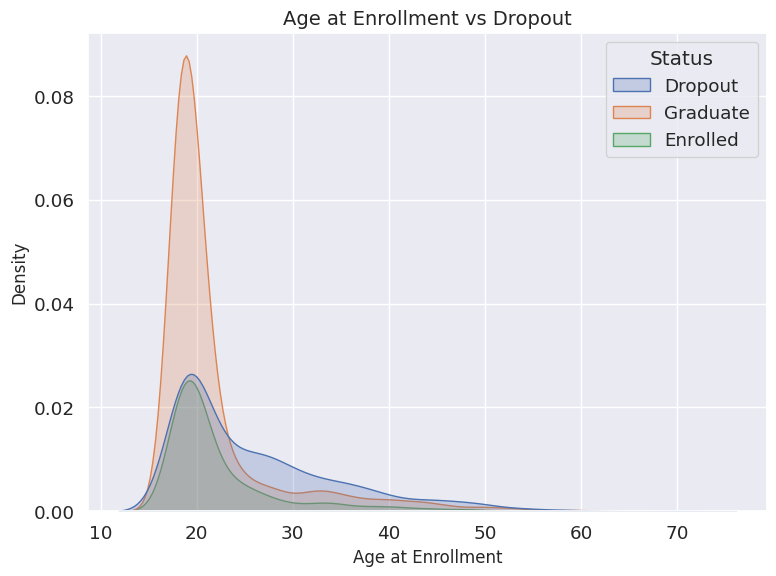

In [44]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='Age_at_enrollment', hue='Status', fill=True)
plt.title('Age at Enrollment vs Dropout', fontsize=14)
plt.xlabel('Age at Enrollment', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()


Jawaban pertanyaan 6: Ya, usia saat mendaftar memengaruhi risiko dropout. Mahasiswa yang mendaftar di usia lebih tua cenderung memiliki risiko dropout yang lebih tinggi. Mahasiswa muda (sekitar 18–22 tahun) memiliki peluang kelulusan yang lebih besar, sementara mahasiswa yang mendaftar di atas usia 25–30 tahun menunjukkan kecenderungan lebih tinggi untuk dropout.

## Data Preparation / Preprocessing

### Hapus Kolom EDA

In [45]:
# hapus kolom tambahan dari EDA
df.drop(['Marital_status_label', 'Tuition_fees_up_to_date_label', 'Course_label'], axis=1, inplace=True)

### Konversi Data Numerik Kategori

In [46]:
# salin dataframe df
df_copy = df.copy()

# konversi data numerik menjadi category
categorical_features = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation', 'Gender', 'Scholarship_holder', 'Displaced', 'Educational_special_needs',
    'Debtor', 'Tuition_fees_up_to_date', 'International', 'Status'
]

for feature in categorical_features:
    df_copy[feature] = df[feature].astype('category')

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   category
 8   Mothers_qualification                         4424 non-null   category
 9   Fathers_qualification                         4424 n

#### Mengganti kategori menjadi Nilai Representasi

In [47]:
# Mapping angka ke label status pernikahan
marital_status_map = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto Union',
    6: 'Legally Separated'
}

application_mode_map = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

course_map = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

daytime_evening_attendance_map = {
    1: 'Daytime',
    0: 'Evening'
}

previous_qualification_map = {
    1: "Secondary education",
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"
}

nacionality_map = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova (Republic of)",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
}

mothers_qualification_map = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    22: "Technical-professional course",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}

fathers_qualification_map = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd year complementary high school course",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical-professional course",
    25: "Complementary High School Course - not concluded",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}

mothers_occupation_map = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    122: "Health professionals",
    123: "teachers",
    125: "Specialists in information and communication technologies (ICT)",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "personal service workers",
    152: "sellers",
    153: "Personal care workers and the like",
    171: "Skilled construction workers and the like, except electricians",
    173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    191: "cleaning workers",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants"
}

fathers_occupation_map = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces personnel",
    112: "Directors of administrative and commercial services",
    114: "Hotel, catering, trade and other services directors",
    121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
    122: "Health professionals",
    123: "teachers",
    124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    135: "Information and communication technology technicians",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "personal service workers",
    152: "sellers",
    153: "Personal care workers and the like",
    154: "Protection and security services personnel",
    161: "Market-oriented farmers and skilled agricultural and animal production workers",
    163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
    171: "Skilled construction workers and the like, except electricians",
    172: "Skilled workers in metallurgy, metalworking and similar",
    174: "Skilled workers in electricity and electronics",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    181: "Fixed plant and machine operators",
    182: "assembly workers",
    183: "Vehicle drivers and mobile equipment operators",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants",
    195: "Street vendors (except food) and street service providers"
}

gender_map = {
    1: 'Male',
    0: 'Female'
}
scholarship_holder_map = {
    1: 'Yes',
    0: 'No'
}

displaced_map = {
    1: 'Yes',
    0: 'No'
}

educational_special_needs_map = {
    1: 'Yes',
    0: 'No'
}

debtor_map = {
    1: 'Yes',
    0: 'No'
}

tuition_fees_up_to_date_map = {
    1: 'Yes',
    0: 'No'
}

international_map = {
    1: 'Yes',
    0: 'No'
}

In [48]:
# proses mapping
df_copy['Marital_status'] = df_copy['Marital_status'].map(marital_status_map)
df_copy['Application_mode'] = df_copy['Application_mode'].map(application_mode_map)
df_copy['Course'] = df_copy['Course'].map(course_map)
df_copy['Daytime_evening_attendance'] = df_copy['Daytime_evening_attendance'].map(daytime_evening_attendance_map)
df_copy['Previous_qualification'] = df_copy['Previous_qualification'].map(previous_qualification_map)
df_copy['Nacionality'] = df_copy['Nacionality'].map(nacionality_map)
df_copy['Mothers_qualification'] = df_copy['Mothers_qualification'].map(mothers_qualification_map)
df_copy['Fathers_qualification'] = df_copy['Fathers_qualification'].map(fathers_qualification_map)
df_copy['Mothers_occupation'] = df_copy['Mothers_occupation'].map(mothers_occupation_map)
df_copy['Fathers_occupation'] = df_copy['Fathers_occupation'].map(fathers_occupation_map)
df_copy['Gender'] = df_copy['Gender'].map(gender_map)
df_copy['Scholarship_holder'] = df_copy['Scholarship_holder'].map(scholarship_holder_map)
df_copy['Displaced'] = df_copy['Displaced'].map(displaced_map)
df_copy['Educational_special_needs'] = df_copy['Educational_special_needs'].map(educational_special_needs_map)
df_copy['Debtor'] = df_copy['Debtor'].map(debtor_map)
df_copy['Tuition_fees_up_to_date'] = df_copy['Tuition_fees_up_to_date'].map(tuition_fees_up_to_date_map)
df_copy['International'] = df_copy['International'].map(international_map)

In [49]:
df_copy.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd phase - general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,127.3,Yes,No,No,Yes,Male,No,20,No,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,142.5,Yes,No,No,No,Male,No,19,No,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase - general contingent,5,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,124.8,Yes,No,No,No,Male,No,19,No,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase - general contingent,2,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,119.6,Yes,No,No,Yes,Female,No,20,No,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,141.5,No,No,No,Yes,Female,No,45,No,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#### Import to Supabase

In [ ]:
# Fetch variables
USER = ... #USERNAME
PASSWORD = ... #PASWORD
HOST = ... #HOSTNAME
PORT = ... #PORT
DBNAME = ... #DBNAME

# Construct the SQLAlchemy connection string
DATABASE_URL = f"postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}?gssencmode=disable"

# Create the SQLAlchemy engine
engine = create_engine(DATABASE_URL)


# Test the connection
try:
    with engine.connect() as connection:
        print("Connection successful!")
except Exception as e:
    print(f"Failed to connect: {e}")

Connection successful!


In [52]:
# import data ke supabase
df_copy.to_sql('students', engine, if_exists='replace', index=False)

9

### Data Preprocessing

In [5]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
# hapus kolom yang tidak perlu karena lebih ke administratif
df.drop(['Application_order', 'Application_mode', 'Admission_grade'], axis=1, inplace=True)

In [7]:
# map 'status' binary, 1 for 'Dropout', and 0 for else
df['Status'] = df['Status'].map({'Dropout': 1, 'Enrolled': 0, 'Graduate':0})

## Modeling

In [8]:
X = df.drop(['Status'], axis=1)
y = df['Status']

In [9]:
# Classification using Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

In [10]:
# Evaluate prediction
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.8598870056497175


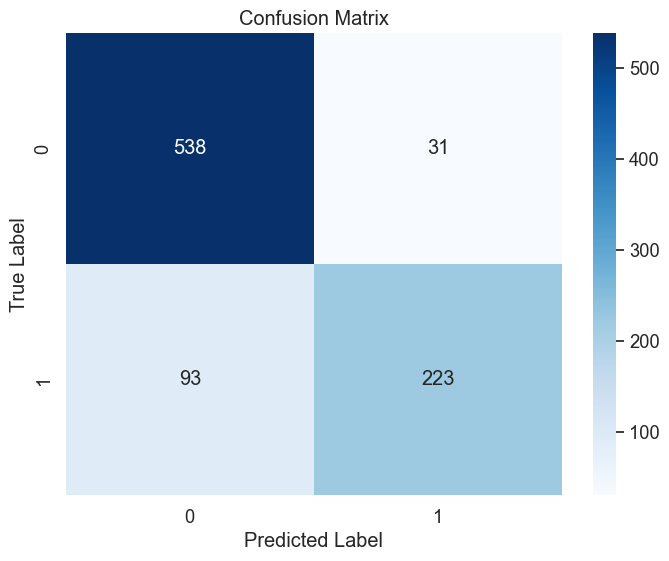

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)  # gunakan label yang sama dengan model

# Plot Confusion Matrix pakai seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [12]:
print('Classification Report:\n')
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       569
           1       0.88      0.71      0.78       316

    accuracy                           0.86       885
   macro avg       0.87      0.83      0.84       885
weighted avg       0.86      0.86      0.86       885



### Save Model


In [13]:
# Pastikan direktori untuk menyimpan model ada
if not os.path.exists('model'):
    os.makedirs('model')

# konversi model ke format joblib
filename = 'model/model.joblib'
joblib.dump(model, filename)
print(f"Model berhasil disimpan ke {filename}")

Model berhasil disimpan ke model/model.joblib


## Feature Importance Analysis

10 Fitur Terpenting:
Curricular_units_2nd_sem_approved       0.156409
Curricular_units_2nd_sem_grade          0.143241
Curricular_units_1st_sem_approved       0.084890
Tuition_fees_up_to_date                 0.066357
Curricular_units_1st_sem_grade          0.059931
Curricular_units_2nd_sem_evaluations    0.047607
Age_at_enrollment                       0.043333
Previous_qualification_grade            0.039819
Course                                  0.039016
Curricular_units_1st_sem_evaluations    0.028748
dtype: float64


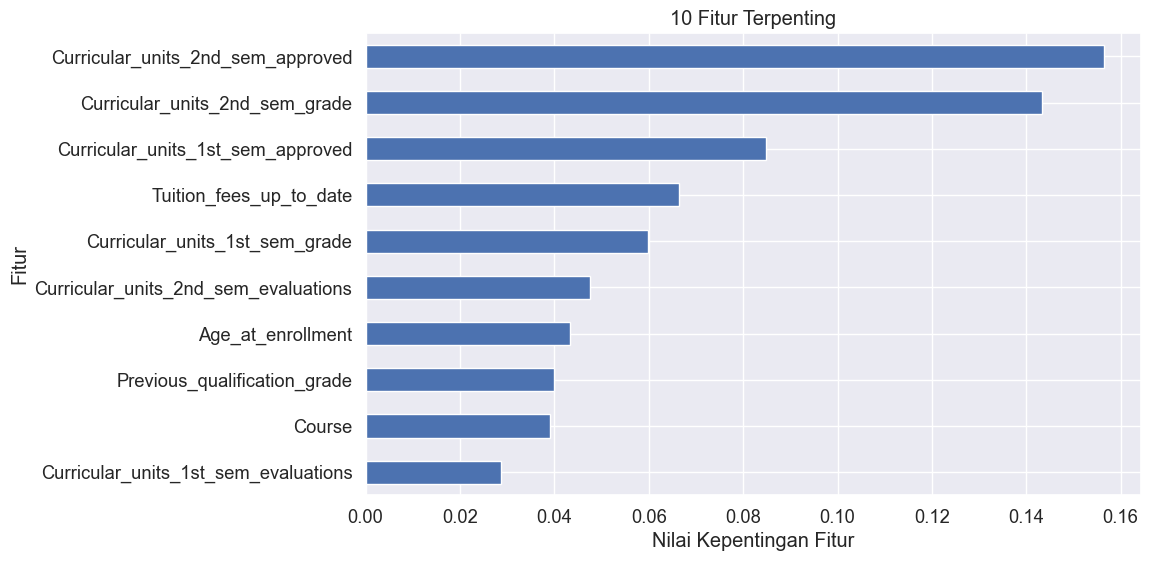

In [14]:
# Mendapatkan nilai feature importances
importances = model.feature_importances_

# Membuat Series Pandas dari feature importances dan nama kolom
feat_importances = pd.Series(importances, index=X.columns)

# Mengurutkan fitur berdasarkan nilai kepentingannya (dari terbesar ke terkecil)
sorted_feat_importances = feat_importances.sort_values(ascending=False)

# Menampilkan 10 fitur teratas dalam bentuk DataFrame
print("10 Fitur Terpenting:")
print(sorted_feat_importances.head(10))

# Membuat plot bar horizontal dari 10 fitur teratas
plt.figure(figsize=(10, 6))
sorted_feat_importances.head(10).plot(kind='barh')
plt.title("10 Fitur Terpenting")
plt.xlabel("Nilai Kepentingan Fitur")
plt.ylabel("Fitur")
plt.gca().invert_yaxis() # Untuk menampilkan fitur dengan kepentingan tertinggi di atas
plt.show()

Grafik di atas menunjukkan 10 fitur terpenting yang mempengaruhi model prediksi dalam konteks akademik. Berdasarkan nilai kepentingan fitur (feature importance), berikut adalah analisis mendalam:

**Interpretasi Hasil**

1. Fitur Dominan: Performa Semester Kedua
Dua fitur dengan nilai kepentingan tertinggi berkaitan dengan semester kedua:
- **Curricular_units_2nd_sem_approved** (nilai ~0.155): Jumlah mata kuliah yang disetujui/lulus pada semester kedua merupakan indikator terkuat dalam model.
- **Curricular_units_2nd_sem_grade** (nilai ~0.145): Nilai rata-rata semester kedua juga sangat berpengaruh.

Hal ini mengindikasikan bahwa performa akademik di semester kedua merupakan prediktor paling signifikan dalam model.

2. Pengaruh Performa Semester Pertama
Fitur terkait semester pertama menempati peringkat moderat:
- **Curricular_units_1st_sem_approved** (nilai ~0.08)
- **Curricular_units_1st_sem_grade** (nilai ~0.06)

Meskipun penting, performa semester pertama memiliki bobot yang lebih rendah dibandingkan semester kedua.

3. Faktor Keuangan
- **Tuition_fees_up_to_date** (nilai ~0.065): Status pembayaran biaya kuliah menempati peringkat keempat, menunjukkan bahwa faktor ekonomi memiliki peran signifikan dalam keberhasilan akademik.

4. Faktor Evaluasi Akademik
- **Curricular_units_2nd_sem_evaluations** (nilai ~0.045)
- **Curricular_units_1st_sem_evaluations** (nilai ~0.025)

Jumlah evaluasi yang diikuti memiliki pengaruh, tetapi tidak sedominan jumlah mata kuliah yang lulus atau nilai rata-rata.

5. Latar Belakang Mahasiswa
- **Age_at_enrollment** (nilai ~0.04): Usia saat pendaftaran 
- **Previous_qualification_grade** (nilai ~0.035): Nilai kualifikasi sebelumnya
- **Course** (nilai ~0.035): Program studi yang dipilih

Ketiga faktor ini memiliki pengaruh yang lebih kecil dibandingkan dengan performa akademik saat ini.

**Rekomendasi Aksi**

1. **Fokus Intervensi**: Institusi pendidikan sebaiknya memberikan perhatian khusus pada performa mahasiswa di semester kedua, yang tampaknya menjadi periode kritis.

2. **Sistem Peringatan Dini**: Mengembangkan sistem yang memantau performa semester kedua dapat membantu mengidentifikasi mahasiswa yang berisiko mengalami kesulitan akademik.

3. **Dukungan Finansial**: Status pembayaran biaya kuliah yang tepat waktu memiliki korelasi dengan keberhasilan akademik, menunjukkan pentingnya program bantuan keuangan.

4. **Pola Adaptasi**: Perbedaan nilai penting antara semester pertama dan kedua mungkin mencerminkan pola adaptasi mahasiswa terhadap lingkungan akademik.
